<center><h1>可压缩管道流动压降计算</h1></center>
<center><h4>韩国晨</h4></center>
<center><h4>Jan-2026</h4></center>


## 前言
本文旨在学习理论和算法，而非实现某个工业应用，因此后续对算法进行了适当简化，以便练习。

## 数值方法
在数值分析的学习中，我们已经接触了二分法、牛顿法、割线法三种基本的求根算法。下面将介绍最后一种算法—不动点迭代。

### 不动点迭代
从函数图像上看，多项式 $x^2 − 5 = 0$ 的两个根大概是$\pm 2.5$，下面看看不动点迭代是如何得到的。

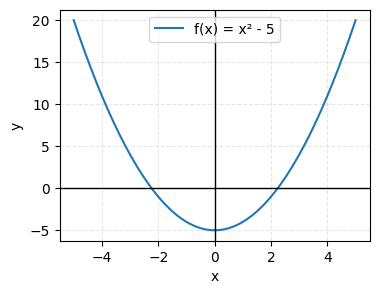

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 50)
y = x**2 - 5

plt.figure(figsize=(4, 3)) # 4" x 3"
plt.plot(x, y, label='f(x) = x² - 5')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.show()

首先将原方程改写为 $x=g(x)$ 的形式。一种可行的变换如下:
$$
x=\frac{3x^2-5}{2x}
$$
由此得到迭代公式：
$$
x_{n+1}=\frac{3x_n^2-5}{2x_n}
$$

从 $x_0=0.5$ 开始迭代，结果如下。
$$
\begin{array}{c c l c}
\hline
n & x_{n+1} & g(x_n) & |\Delta x| \\
\hline
0 & -4.25 & (3 \times 0.5^2 - 5) / (2 \times 0.5) = -4.25 & - \\
1 & -6.08824 & (3 \times (-4.25)^2 - 5) / (2 \times (-4.25)) \approx -6.08824 & 1.83824 \\
2 & -9.04348 & (3 \times (-6.08824)^2 - 5) / (2 \times (-6.08824)) \approx -9.04348 & 2.95524 \\
3 & -13.56522 & (3 \times (-9.04348)^2 - 5) / (2 \times (-9.04348)) \approx -13.56522 & 4.52174 \\
4 & -20.34783 & (3 \times (-13.56522)^2 - 5) / (2 \times (-13.56522)) \approx -20.34783 & 6.78261 \\
5 & -30.52174 & (3 \times (-20.34783)^2 - 5) / (2 \times (-20.34783)) \approx -30.52174 & 10.17391 \\
6 & -45.78261 & (3 \times (-30.52174)^2 - 5) / (2 \times (-30.52174)) \approx -45.78261 & 15.26087 \\
7 & -68.67391 & (3 \times (-45.78261)^2 - 5) / (2 \times (-45.78261)) \approx -68.67391 & 22.89130 \\
8 & -103.02174 & (3 \times (-68.67391)^2 - 5) / (2 \times (-68.67391)) \approx -103.02174 & 34.34783 \\
9 & -154.52174 & (3 \times (-103.02174)^2 - 5) / (2 \times (-103.02174)) \approx -154.52174 & 51.50000 \\
10 & -231.78261 & (3 \times (-154.52174)^2 - 5) / (2 \times (-154.52174)) \approx -231.78261 & 77.26087 \\
\hline
\end{array}
$$
显然，以上迭代不收敛。

下面换另一种等价的转换：
$$
x_{n+1}=\frac{x_n+5}{x_n+1}
$$
仍然从 $x_0=0.5$ 开始，结果如下。
$$
\begin{array}{c c c c}
\hline
n & x_{n+1} & g(x_n) & |\Delta x| \\
\hline
0 & 3.66667 & (0.5 + 5) / (0.5 + 1) \approx 3.66667 & - \\
1 & 1.85714 & (3.66667 + 5) / (3.66667 + 1) \approx 1.85714 & 1.80952 \\
2 & 2.40000 & (1.85714 + 5) / (1.85714 + 1) \approx 2.40000 & 0.54286 \\
3 & 2.17647 & (2.40000 + 5) / (2.40000 + 1) \approx 2.17647 & 0.22353 \\
4 & 2.25926 & (2.17647 + 5) / (2.17647 + 1) \approx 2.25926 & 0.08279 \\
5 & 2.22727 & (2.25926 + 5) / (2.25926 + 1) \approx 2.22727 & 0.03199 \\
6 & 2.23944 & (2.22727 + 5) / (2.22727 + 1) \approx 2.23944 & 0.01216 \\
7 & 2.23478 & (2.23944 + 5) / (2.23944 + 1) \approx 2.23478 & 0.00465 \\
8 & 2.23656 & (2.23478 + 5) / (2.23478 + 1) \approx 2.23656 & 0.00178 \\
9 & 2.23588 & (2.23656 + 5) / (2.23656 + 1) \approx 2.23588 & 0.00068 \\
10 & 2.23614 & (2.23588 + 5) / (2.23588 + 1) \approx 2.23614 & 0.00026 \\
\hline
\end{array}
$$

这一次收敛了。why？

从几何角度看，不动点迭代就是不断逼近直线 $y=x$ 和 曲线 $y=g(x)$ 交点的过程，交点的 x 坐标即为根，记作 $x^*$，而交点被称为“不动点”。
<div align="center">
  <img src="https://pages.hmc.edu/ruye/MachineLearning/lectures/figures/fixedpoint.png" width="30%">
</div>

下面探析下迭代收敛的条件。首先在不动点对 $g(x)$ 进行泰勒展开：
$$
g(x)=g(x^*)+\frac{(x-x^*)^1}{1!} g'(x^*)+ \frac{(x-x^*)^2}{2!} g''(x^*)+ \frac{(x-x^*)^3}{3!} g'''(x^*)+\cdots
$$

取其线性部分：
$$
g(x)\approx g(x^*)+(x-x^*)g'(x^*) \Longrightarrow g(x)-g(x^*) \approx (x-x^*)g'(x^*)
$$
接着利用不动点坐标相等的条件，即 $x^*=g(x^*)$，将其代入上式：
$$
g(x)-x^* \approx (x-x^*)g'(x^*)
$$

令 $x=x_n$，有：
$$
g(x_n)-x^* \approx (x_n-x^*)g'(x^*)
$$
根据迭代公式，有 $x_{n+1}=g(x_n)$，则：
$$
x_{n+1}-x^* \approx (x_n-x^*)g'(x^*)
$$
这说明：当前轮到精确解的距离等于上一轮的距离乘以不动点的导数。如果导数的绝对值 $|g'(x^*)|$ 小于 1，则会不断逼近精确解，否则远离。

计算上例中不动点处导数的绝对值，发现收敛的变换对应的值小于1。
$$
\begin{gathered}
    |g_1'(\sqrt{5})| = \left|\frac{3(\sqrt{5})^2 + 5}{2(\sqrt{5})^2}\right| = |2|=2\\[2em]
    |g_2'(\sqrt{5})| = \left|\frac{-2(3 - \sqrt{5})}{4}\right| = |-0.382|=0.382
\end{gathered}
$$

### 方程组求解
很多工程问题最后都会落到求解非线性方程组，工程上主流的解法是利用雅可比矩阵和高斯消元的牛顿迭代法。其实，不动点迭代也可求解之，方法如下。
$$
\left\{
\begin{aligned}
p_{n+1}=f(p_n) \\[2ex]
T_{n+1}=g(T_n)
\end{aligned}
\right.
$$
当切比雪夫范数 $\mathrm{min}(|p_{n+1}-p_{n}|, |T_{n+1}-T_{n}|) <\epsilon $ 时，迭代收敛。

## 流动方程
可压缩流体远比不可压缩流体复杂，本文要研究的是可压缩流体在管道和喷嘴这两种典型流道内的一维、稳态流动。一维指流动中流体的各物理量（速度、压力、温度等）仅沿管道轴向变化，也就是说用一个数值就代表了整个截面上的某个参数；稳态指任一点的流动参数不随时间变化。

绝热流动和等温流动是可压缩流体在等截面管道内两种典型的流动型式。流体在较好保温管中或较短裸管中的流动可被视为绝热流动。这是因为流体在离开管道之前，只能与环境短暂换热，所以换热量常常忽略不计。安全阀的排放就是一种典型的绝热流动。对于较长的裸管，由于流体能够与环境充分换热，并最终达到热平衡，因此一般被当作等温流动处理。

### 控制方程

任何流动都受质量守恒方程和能量守恒方程（研究管流时一般忽略做功和势能的变化）的制约，摩擦流还受如下形式动量守恒方程的制约。
$$
\begin{gathered}
    \rho_1 V_1A_1 = \rho_2 V_2A_2\\[1em]
    h_1 + \frac{V_1^2}{2} = h_2 + \frac{V_2^2}{2} + q\\[1em]
    p_1 + \rho_1 V_1^2 = p_2 + \rho_2 V_2^2 + f_d \frac{L}{D_h} \cdot \frac{\rho_1 V_1^2}{2}
\end{gathered}
$$

上述方程中出现了多个未知量，显然仅靠这三个方程是解不出来的，因此还需引入其它约束。

### 物性方程
理想气体方状态程建立了密度和压力、温度的关系。
$$
\rho=\frac{p}{R_gT}\Longrightarrow\frac{\rho_2}{\rho_1}=\frac{p_2T_1}{T_2p_1}
$$
比焓降的热力学定义建立了比焓与温度和定压比热容的关系。
$$
\mathrm{d}h = c_p\mathrm{d}T
$$
气体的定压比热容对温度不敏感，例如，空气的温度从 -18 C 升至 2760 C，定压比热容仅上升 30%。因此，常常假定气体的定压比热容为常数。

### 计算单元
分段计算是流体流动最基本的计算方法，方法核心是：将整个管道分成 N 个计算单元，逐段计算，将每段出口参数作为下一段的进口参数。如此往复，迭代推进。分段越短，误差越小，但计算量亦随之增加。

下图示意了绝热流动的计算单元。已知进口参数（$p_1,T_1,V_1$）和几何尺寸（$L,D_h$），求出口参数（$p_2,T_2,V_2$）。
<div align="center">
  <img src="https://i0.wp.com/tvax2.sinaimg.cn/large/009dZlbQgy1i9dy3ryvglj30in05mt91.jpg">
</div>

## 绝热管流
绝热管流的管道截面积相同，且无传热，控制方程表达为：
$$
\begin{gathered}
\rho_1 V_1 = \rho_2 V_2\\[1em] 
    h_1 + \frac{V_1^2}{2} = h_2 + \frac{V_2^2}{2}\\[1em] 
    p_1 + \rho_1 V_1^2 = p_2 + \rho_2 V_2^2 + f_d \frac{L}{D_h} \cdot \frac{\rho_1 V_1^2}{2}
\end{gathered}
$$
### 方程化简
将比焓降定义式和质量守恒方程代入到能量守恒方程，消去速度变量和密度变量，则方程化简为：
$$
    h_2 - h_1 = \frac{{V_1}^2-{V_2}^2}{2} \Longrightarrow 
    c_p(T_2-T_1)=\frac{1}{2}\left[V_1^2-V_1^2{\left(\frac{\rho_1}{\rho_2}\right)}^2\right] \Longrightarrow
    \boxed{2c_p(\color{magenta}{T_2}-T_1)=V_1^2\left[1-{\left(\frac{\color{magenta}{T_2}p_1}
    {\color{magenta}{p_2}T_1}\right)}^2\right]}
$$

将理想气体状态方程带代到动量守恒方程，则方程化简为：
$$
\begin{aligned}
&p_1 + \rho_1 V_1^2 = p_2 + \rho_2 V_2^2 + f_d \frac{\mathrm{d}L}{D_h} \cdot \frac{\rho_1 V_1^2}{2}\Longrightarrow
p_1 + \frac{p_1}{R_gT_1} V_1^2=p_2 + \frac{p_2}{R_gT_2} V_2^2+ f_d \frac{\mathrm{d}L}{D_h} \cdot \frac{p_1 V_1^2}{2R_gT_1}\Longrightarrow\\[2ex]
&p_1 + \frac{p_1}{R_gT_1} V_1^2=p_2+ \frac{p_2}{R_gT_2} V_1^2\left(\frac{p_1 T_2}{p_2 T_1}\right)^2+ f_d \frac{\mathrm{d}L}{D_h} \cdot \frac{p_1 V_1^2}{2R_gT_1}
\Longrightarrow
\boxed{p_1 + \frac{p_1}{R_gT_1} V_1^2=\color{magenta}{p_2}+ V_1^2 \cdot \frac{p_1^2 \color{magenta}{T_2}}{R_gT_1^2\color{magenta}{p_2} }+ f_d \frac{\mathrm{d}L}{D_h} \cdot \frac{p_1 V_1^2}{2R_gT_1}}
\end{aligned}
$$
### 编程实现
以下示例程序包含两个核心函数。fanno_segment 的功能是以管段进口参数为输入，利用控制方程，通过不动点迭代求解出口参数。fanno_pipe 再通过一个“死循环”反复调用 fanno_segment 。每次调用前，将上一管段的出口参数赋给当前管段的进口。由此，程序得以沿管长逐段推进，直至异常发生。

达到最大迭代次数后，fanno_segment 会立刻抛出异常；被 fanno_pipe 捕获到后，程序就跳出“死循环”，终止计算。程序最终将返回主函数 main，输出结果后退出。

In [2]:
from tabulate import tabulate

# ========================================================================================
# Fanno Flow - Multi-Segment Solver (SI Units)
# Author: Robin Han
# Date: December, 2025
# All variables are in SI:
# Pressure (Pa), Temperature (K), Velocity (m/s), Length (m), Diameter (m), R (J/kg·K)
# ========================================================================================

# Nitrogen properties
Rg = 8.314 / 28.014e-3  # J/kg·K (gas constant for N2)
CP = 1072.0  # J/kg·K (specififc heat at constant pressure@20bara/20C)
K = 1.4  # ratio of specific heats for diatomic gas (approx)

# Numerical parameters
TOL = 1e-6  # convergence tolerance for p2 and T2
MAX_ITER = 200  # maximum iterations per segment


def isothermal_segment(p1, T1, V1, fd, D, dL):
    """
    Solve one Fanno-flow segment using fixed-point iteration.

    Inputs:
        p1 : inlet pressure  (Pa)
        T1 : inlet temperature (K)
        V1 : inlet velocity (m/s)

    Returns:
        p2 : outlet pressure (Pa)
        T2 : outlet temperature (K)
        V2 : outlet velocity (m/s)
    """

    # Initial guesses for unknown outlet values
    p2 = 0.95 * p1
    T2 = T1

    counter = 0
    while counter < MAX_ITER:

        # --- Update pressure from momentum equation ---
        # p1 + (p1/(RG*T1))*V1^2 = p2 + V1^2 * (p1^2 * T2)/(RG*T1^2 * p2) + F*L/D *K*(p1*V1^2)/(2*RG*T1)
        # -> p2 = p1 + (p1*V1^2)/(RG*T1) - V1^2 * p1^2 * T2 / (RG*T1^2*p2) - F*L/D * p1 * V1^2 / (2*RG*T1)
        p2_new = p1 + (p1 * V1**2) / (R * T1) - (V1**2 * p1**2 * T2) / (R * T1**2 * p2) - (fd * dL / D * p1 * V1**2) / (2 * R * T1)

        # --- Update temperature from energy equation ---
        # 2*cp*(T2 - T1) = V1^2 * [1 - (T2*p1/(p2*T1))^2]
        # -> T2 = T1 + V1^2 * (1 - (T2*p1/(p2*T1))^2) / (2*Cp)
        T2_new = T1 + V1**2 * (1 - (T2 * p1 / (p2_new * T1)) ** 2) / (2 * CP)

        # Convergence check on both pressure and temperature
        if min(abs(p2_new - p2), abs(T2_new - T2)) < TOL:
            p2, T2 = p2_new, T2_new
            break

        # Go to next iteration using updated values
        p2, T2 = p2_new, T2_new
        counter += 1
    else:
        # Only executed if while loop exits without break
        raise RuntimeError("Lack of convergence in fanno_segment")

    # --- Compute outlet velocity using mass conservation ---
    # rho1 * V1 = rho2 * V2, rho = P / (RG*T)
    rho1 = p1 / (R * T1)
    rho2 = p2 / (R * T2)
    V2 = rho1 * V1 / rho2

    return p2, T2, V2


def isothermal_pipe(p0, T0, V0, fd, D, dL):
    """
    March along the pipe using multiple Fanno segments.
    Uses an infinite loop to advance segment by segment
    until:
      - lack of convergence (numerical issue), or
      - choking (Mach number close to 1)

    Returns:
        results : list of (P, T, V, M) at each segment outlet
    """

    total_length = 0.0
    results = []

    p1, T1, V1 = p0, T0, V0
    while True:
        try:
            p2, T2, V2 = isothermal_segment(p1, T1, V1, fd, D, dL)
        except RuntimeError as e:
            print(f"\n[Warning] {e}. Stopping at length = {total_length:.3f} m")
            break

        total_length += dL
        c2 = (K * R * T2) ** 0.5
        Ma2 = V2 / c2
        results.append((total_length, p2, T2, V2, Ma2))

        p1, T1, V1 = p2, T2, V2

    return results

if __name__ == "__main__":
    # 20 bara, 20 C, 100 m/s, fd = 0.02, D = 0.1, dL = 0.01
    profile = isothermal_pipe(20e5, 20.0 + 273.15, 100.0, 0.02, 0.1, 0.1)

    headers = ["No.", "Length (m)", "Pressure (bara)", "Temp (C)", "Velocity (m/s)", "Mach Number"]
    table_data = []
    for i, (L, p, t, v, ma) in enumerate(profile):
        table_data.append([i, f"{L:.3f}", f"{p/1E5:.3f}", f"{t-273.15:.1f}", f"{v:.3f}", f"{ma:.3f}"])

    print(tabulate(table_data, headers=headers, tablefmt="grid", stralign="center", numalign="center"))

NameError: name 'R' is not defined

### 剩余长度
在 Fanno 流动中，无论起始马赫数是亚音速还是超音速，随着流动沿程推进，马赫数都会向 1 逼近，最终达到称为“噎塞”（choking）的状态。从当前马赫数到达 choking 状态所需的管道长度，称为剩余长度，表示为 $L^*$。

#### 变换
三大控制方程中，只有动量守恒方程涉及长度，因此我们要从该方程出发，进行推导。方程两边除以 $\rho V^2$，摩擦项的变量只剩 $\mathrm{d}L$，这样对距离积分就简单了。
$$
\mathrm{d}p+\rho V\mathrm{d}V+f_d\frac{dL}{D_h}\cdot\frac{\rho V^2}{2}=\frac{\mathrm{d}p}{\rho V^2}+\frac{\rho V\mathrm{d}V}{\rho V^2}+f_d\frac{dL}{2D_h}= \frac{\mathrm{d}p}{\rho V^2}+\frac{\mathrm{d}V}{V}+f_d\frac{dL}{2D_h}=0
$$
代入速度关于马赫数表达式 $(V=Ma\sqrt{kR_gT})$ 到上式：
$$
\frac{\mathrm{d}p}{\underline{\underline{\rho}} Ma^2k\underline{\underline{R_gT}}}+\frac{\mathrm{d}V}{V}+f_d\frac{dL}{2D_h}=\frac{1}{kMa^2}\cdot\frac{\mathrm{d}p}{\underline{\underline{p}}}+\frac{\mathrm{d}V}{V}+f_d\frac{dL}{2D_h}=0
$$
#### 换元
现在要把 $\mathrm{d}p/p$ 和 $\mathrm{d}V/V$ 消掉，最好是能用马赫数表示。管道中的流体，其截面参数是距离的单值函数，且还是单调变化的。这就意味着，所有参数都可以表示为其中某个参数的函数，比如马赫数的函数，即：$p=f(Ma),T=g(Ma),\rho=u(Ma),V=w(Ma)$。那么相应的变化率 $\mathrm{d}x/x$ 也可以统统表示为马赫数相关的变化率。

温度关于滞止温度的表达式如下：
$$
T=\frac{T_0}{1+\frac{k-1}{2}Ma^2}
$$
因为 Fanno 流动滞止焓守恒，所以滞止温度不变。

对上式取对数：
$$
\ln{T}=\ln{\left(\frac{T_0}{1+\frac{k-1}{2}Ma^2}\right)}=\ln{T_0}-\ln\left({1+\frac{k-1}{2}Ma^2}\right)=-\ln\left({1+\frac{k-1}{2}Ma^2}\right)
$$
对其微分：
$$
-\frac{\mathrm{d}(1+\frac{k-1}{2}Ma^2)}{1+\frac{k-1}{2}Ma^2}=\boxed{-\frac{k-1}{2}\frac{\mathrm{d}Ma^2}{1+\frac{k-1}{2}Ma^2}=\frac{\mathrm{d}T}{T}}
$$
取速度关于马赫数表达式的对数：
$$
\ln V= \ln \left(Ma\sqrt{kR_gT}\right)= \ln Ma+ \frac{1}{2}\ln (kR_gT)=\ln Ma+ \frac{1}{2}\ln (kR_g)+\frac{1}{2}\ln T
$$
对其微后再代入 $\mathrm{d}T/T$：
$$
\frac{\mathrm{d}Ma}{Ma}+0+\frac{1}{2}\frac{\mathrm{d}T}{T}=\frac{\mathrm{d}Ma}{Ma}-\frac{1}{2}\frac{k-1}{2}\frac{\mathrm{d}Ma^2}{1+\frac{k-1}{2}Ma^2}=\frac{\mathrm{d}Ma^2}{2Ma^2}-\frac{1}{2}\frac{k-1}{2}\frac{\mathrm{d}Ma^2}{1+\frac{k-1}{2}Ma^2}=\frac{4+2kMa^2-2Ma^2-2kMa^2+2Ma^2}{8Ma^2(1+\frac{k-1}{2}Ma^2)}\mathrm{d}Ma^2=\boxed{\frac{\mathrm{d}Ma^2}{2Ma^2(1+\frac{k-1}{2}Ma^2)}=\frac{\mathrm{d}V}{V}}
$$
结合质量守恒方程和理想气体状态方程，压力的变化率可表示为：
$$
\left.
\begin{aligned}
\rho V = const \Longrightarrow \frac{\mathrm{d}\rho}{\rho}=-\frac{\mathrm{d}V}{V}\\[2ex]
p=\rho RT \Longrightarrow \frac{\mathrm{d}p}{p}=\frac{\mathrm{d}\rho}{\rho}+\frac{\mathrm{d}T}{T}
\end{aligned}
\right\}
\Longrightarrow \frac{\mathrm{d}p}{p}=\frac{\mathrm{d}T}{T}-\frac{\mathrm{d}V}{V}
$$
代入推导结果：
$$
-\frac{k-1}{2}\frac{\mathrm{d}Ma^2}{1+\frac{k-1}{2}Ma^2}-\frac{\mathrm{d}Ma^2}{2Ma^2(1+\frac{k-1}{2}Ma^2)}=\boxed{-\mathrm{d}Ma^2\frac{kMa^2-Ma^2+1}{2Ma^2(1+\frac{k-1}{2}Ma^2)}=\frac{\mathrm{d}p}{p}}
$$
#### 回代
将 $\mathrm{d}p/p$ 和 $\mathrm{d}V/V$ 的马赫数表达式代入开头变换后的动量守恒方程：
$$
\frac{1}{kMa^2}\cdot-\frac{kMa^2-Ma^2+1}{2Ma^2(1+\frac{k-1}{2}Ma^2)}\mathrm{d}Ma^2+\frac{\mathrm{d}Ma^2}{2Ma^2(1+\frac{k-1}{2}Ma^2)}=\frac{-kMa^2+Ma^2-1+kMa^2}{2kMa^4 \left( 1 + \frac{k-1}{2} Ma^2 \right)}\mathrm{d}Ma=\boxed{\frac{Ma^2-1}{2kMa^4 \left( 1 + \frac{k-1}{2} Ma^2 \right)}\mathrm{d}Ma^2=f_d\frac{dL}{2D_h}}
$$
#### 积分
L 距离处马赫数是 Ma，$L_2$ 距离处马赫数是 $Ma_2$，分别作为上下限，积分得到：
$$
\frac{f_d}{D_h}\int_{L}^{L_2}\mathrm{d}L=\int_{Ma}^{Ma_2}\frac{Ma^2-1}{k Ma^4[1+1/2(k -1)Ma^2]}\mathrm{d}Ma^2 \Longrightarrow \frac{f_d}{D_h} (L_2 - L)=\frac{1}{k}\left( \frac{1}{Ma^2} - \frac{1}{Ma_2^2} \right)+ \frac{k+1}{2k}\ln\left[\frac{Ma^2 \left( 1 + \frac{k-1}{2} Ma_2^2 \right)}{Ma_2^2 \left( 1 + \frac{k-1}{2} Ma^2 \right)}\right]
$$
令 $Ma_2=1$，求得如下剩余管长 $(L_2 - L)$ 的计算公式。
$$
\boldsymbol{
\frac{f_d}{D_h}  L^{*}=\left(\frac{1-Ma^{2}}{k Ma^{2}}\right)+\frac{k + 1}{2k}\ln\left[\frac{(k + 1) Ma^{2}}{ 2 + (k-1) Ma^{2} }\right]
}
$$

#### 验证

示例程序的输入如下：

- **介质**：氮气
- **初始压力**：20 bara
- **初始温度**：20 °C
- **初始流速**：100 m/s
- **达西摩擦因子**：0.02
- **管道内径**：0.1 m
- **绝热指数**：1.4
- **气体常数**：296.78 J/kg·K

初始马赫数计算为 0.28653，一起代入到上式。

$$
L^* = \left\{ \frac{1-Ma^2}{k Ma^2} + \frac{k+1}{2k} \ln\left[{\frac{(k+1)Ma^2}{2+(k-1)Ma^2}}\right] \right \} \times \frac{D_h}{f_d}= \left\{ \frac{1-0.28653^2}{1.4 \times 0.28653^2} + \frac{1.4+1}{2 \times 1.4} \ln\left[{\frac{(1.4+1) \times 0.28653^2}{2+(1.42-1) \times 0.28653^2}}\right] \right\} \times \frac{0.1}{0.02} = 29.94\ \text{m}
$$
可见，公式结果与程序结果几乎一致。

### 压降计算
对上节的推导式 $\mathrm{d}x/x$ 分别积分，便可得到任意两点的参数比与对应马赫数的关系。
$$
\begin{aligned}
\int_{p_1}^{p_2}\frac{dp}{p}&=\int_{Ma_1}^{Ma_2}-\frac{kMa^2-Ma^2+1}{2Ma^2(1+\frac{k-1}{2}Ma^2)}\, d(Ma^2)&\Longrightarrow&
\boxed{\frac{p_2}{p_1}=\frac{Ma_1}{Ma_2}\left(\frac{1+\frac{k-1}{2}Ma_1^2}{1+\frac{k-1}{2}Ma_2^2}\right)^{1/2}}\\[2ex]
\int_{T_1}^{T_2}\frac{dT}{T}&=\int_{Ma_1}^{Ma_2}-\frac{k-1}{2(1+\frac{k-1}{2}Ma^2)}\, d(Ma^2)
&\Longrightarrow&\boxed{\frac{T_2}{T_1}=\frac{1+\frac{k-1}{2}Ma_1^2}{1+\frac{k-1}{2}Ma_2^2}}\\[2ex]
\int_{V_1}^{V_2}\frac{dV}{V}&=\int_{Ma_1}^{Ma_2}\frac{1}{2Ma^2(1+\frac{k-1}{2}Ma^2)}\, d(Ma^2)&\Longrightarrow&
\boxed{\frac{V_2}{V_1}=\frac{Ma_2}{Ma_1}\left(\frac{1+\frac{k-1}{2}Ma_1^2}{1+\frac{k-1}{2}Ma_2^2}\right)^{1/2}=\frac{\rho_1}{\rho_2}}
\end{aligned}
$$
再结合“剩余长度”公式，就能计算 Fanno 流的压降，方法流程如下：
1. 根据起点马赫数计算起点的剩余长度
2. 根据两点距离得到终点的剩余长度
3. 根据终点剩余长度反向计算终点的马赫数
4. 根据两点马赫数计算压比，乘以起点压力就得到终点压力。

示例代码如下，结果与分段计算一致。

In [ ]:
import math

# ========================================================================================
# Fanno Flow -Given point1 state and distance dx, solve point2 pressure.
#
# Assumptions:
# - Ideal gas, adiabatic, constant area pipe (Fanno flow)
# - Darcy friction factor fd is used (NOT Fanning)
# - Subsonic inlet only (Ma1 < 1). For Ma1>1, the direction/logic differs.
# ========================================================================================

# Gas properties (Nitrogen example)
R = 296.78  # J/kg·K
K = 1.4  # ratio of specific heats

# Numerical settings for Mach inversion
TOL = 1e-12
MAX_ITER = 200


def Lstar2Ma(Lstar, fd, D):
    """
    Invert Mach number from given Lstar.
    Uses fixed-point iteration.
    """
    # Initial guess
    Ma = 0.5
    counter = 0
    target = Lstar * fd / D
    while counter < MAX_ITER:
        term1 = (1.0 - Ma * Ma) / (K * Ma * Ma)
        term2 = (K + 1.0) / (2.0 * K) * math.log(((K + 1.0) * Ma * Ma) / (2.0 + (K - 1.0) * Ma * Ma))
        Lstar_calc = term1 + term2

        # Update Mach using relaxation
        Ma_new = Ma * (Lstar_calc / target) ** 0.5  # simple relaxation can facilitate convergence

        # Convergence check
        if abs(Ma_new - Ma) < TOL:
            return Ma_new

        Ma = Ma_new
        counter += 1

    raise RuntimeError("Lack of convergence in Lstart2Ma")


def clac_pressure_ratio(Ma1, fd, D, dx):

    # 1) point1 remaining length
    term1 = (1.0 - Ma1 * Ma1) / (K * Ma1 * Ma1)
    term2 = (K + 1.0) / (2.0 * K) * math.log(((K + 1.0) * Ma1 * Ma1) / (2.0 + (K - 1.0) * Ma1 * Ma1))
    Lstar1 = (term1 + term2) * (D / fd)

    # 2) point2 remaining length
    Lstar2 = Lstar1 - dx

    # 3) invert Mach2 (or choke)
    if Lstar2 <= 0.0:
        Ma2 = 1.0
    else:
        Ma2 = Lstar2Ma(Lstar2, fd, D)

    # 4) compute pressure ratio
    a1 = 1.0 + (K - 1.0) / 2.0 * Ma1 * Ma1
    a2 = 1.0 + (K - 1.0) / 2.0 * Ma2 * Ma2
    pr = (Ma1 / Ma2) * math.sqrt(a1 / a2)
    # Tr = a1 / a2
    # Vr = (Ma2 / Ma1) * math.sqrt(a1 / a2)

    return pr


if __name__ == "__main__":
    # distance between point 1 and 2
    dx = 14.0  # m

    p1 = 20e5
    T1 = 20.0 + 273.15
    V1 = 100.0
    fd = 0.02
    D = 0.1
    Ma1 = V1 / math.sqrt(K * R * T1)

    pr = clac_pressure_ratio(Ma1, fd, D, dx)
    p2 = p1 * pr
    print(f"p2 = {p2/1E5:.3f} bara @ dL = {dx} m")

p2 = 15.854 bara @ dL = 14.0 m


## 等温管流
由于绝热管流存在传热，能量守恒方程不再适用，只满足质量守恒和动量守恒。用质量守恒方程变换后的动量守恒方程同上节，并且 $T_1$、$T_2$ 统一用 $T$ 表示：
$$
{p_2}+ V_1^2 \cdot \frac{p_1^2}{p_2R_gT}+ f_d \frac{\mathrm{d}L}{D_h} \cdot \frac{p_1 V_1^2}{2R_gT}=0
$$
### 编程实现
编程思路与绝热流动相同，只是退化为用不动点迭代求解单个动量方程。


In [ ]:
from tabulate import tabulate

# ========================================================================================
# Isothermal Flow - Multi-Segment Solver (SI Units)
# Author: Robin Han
# Date: December, 2025
# All variables are in SI:
# Pressure (Pa), Temperature (K), Velocity (m/s), Length (m), Diameter (m), R (J/kg·K)
# ========================================================================================

# Nitrogen properties
R = 8.314 / 28.014e-3  # J/kg·K (specific gas constant for N2)
CP = 1072.0  # J/kg·K (specififc heat at constant pressure@20bara/20C)
K = 1.4  # ratio of specific heats for diatomic gas (approx)

# Numerical parameters
TOL = 1e-6  # convergence tolerance for p2 and T2
MAX_ITER = 200  # maximum iterations per segment


def isothermal_segment(p1, T, V1, fd, D, dL):
    """
    Solve one Isothermal-flow segment using fixed-point iteration.

    Inputs:
        p1 : inlet pressure  (Pa)
        T : inlet temperature (K)
        V1 : inlet velocity (m/s)

    Returns:
        p2 : outlet pressure (Pa)
        V2 : outlet velocity (m/s)
    """

    # Initial guesses for unknown outlet values
    p2 = 0.95 * p1

    counter = 0
    while counter < MAX_ITER:
        # --- Update pressure from momentum equation ---
        # p1 + (p1/(RG*T))*V1^2 = p2 + V1^2 * (p1^2 * T2)/(RG*T^2 * p2) + F*L/D *K*(p1*V1^2)/(2*RG*T)
        # -> p2 = p1 + (p1*V1^2)/(RG*T) - V1^2 * p1^2 * T / (RG*T^2*p2) - F*L/D * p1 * V1^2 / (2*RG*T)
        p2_new = (
            p1
            + (p1 * V1**2) / (R * T)
            - (V1**2 * p1**2) / (R * T * p2)
            - (fd * dL / D * p1 * V1**2) / (2 * R * T)
        )

        # Convergence check on both pressure and temperature
        if (abs(p2_new - p2)) < TOL:
            p2 = p2_new
            break

        # Go to next iteration using updated values
        p2 = p2_new
        counter += 1
    else:
        # Only executed if while loop exits without break
        raise RuntimeError("Lack of convergence in fanno_segment")

    # --- Compute outlet velocity using mass conservation ---
    # rho1 * V1 = rho2 * V2, rho = P / (RG*T)
    rho1 = p1 / (R * T)
    rho2 = p2 / (R * T)
    V2 = rho1 * V1 / rho2

    return p2, V2


def isothermal_pipe(p0, T, V0, fd, D, dL):
    """
    March along the pipe using multiple Fanno segments.
    Uses an infinite loop to advance segment by segment
    until:
      - lack of convergence (numerical issue), or
      - choking (Mach number close to 1)

    Returns:
        results : list of (P, T, V, M) at each segment outlet
    """

    total_length = 0.0
    results = []

    p1, V1 = p0, V0
    while True:
        try:
            p2, V2 = isothermal_segment(p1, T, V1, fd, D, dL)
        except RuntimeError as e:
            print(f"\n[Warning] {e}. Stopping at length = {total_length:.3f} m")
            break

        total_length += dL
        c2 = (K * R * T) ** 0.5
        Ma2 = V2 / c2
        results.append((total_length, p2, T, V2, Ma2))

        p1, V1 = p2, V2
    return results


if __name__ == "__main__":
    # 20 bara, 20 C, 100 m/s, fd = 0.02, D = 0.1, dL = 0.1
    profile = isothermal_pipe(20e5, 20.0 + 273.15, 100.0, 0.02, 0.1, 0.1)

    headers = [
        "No.",
        "Length (m)",
        "Pressure (bara)",
        "Temp (C)",
        "Velocity (m/s)",
        "Mach Number",
    ]
    table_data = []
    for i, (L, p, t, v, ma) in enumerate(profile):
        table_data.append(
            [i, f"{L:.3f}", f"{p/1E5:.3f}", f"{t-273.15:.1f}", f"{v:.3f}", f"{ma:.3f}"]
        )

    print(
        tabulate(
            table_data,
            headers=headers,
            tablefmt="grid",
            stralign="center",
            numalign="center",
        )
    )


[Warning] Lack of convergence in fanno_segment. Stopping at length = 27.700 m
+-------+--------------+-------------------+------------+------------------+---------------+
|  No.  |  Length (m)  |  Pressure (bara)  |  Temp (C)  |  Velocity (m/s)  |  Mach Number  |
+=======+==============+===================+============+==================+===============+
|   0   |     0.1      |      19.974       |     20     |      100.13      |     0.287     |
+-------+--------------+-------------------+------------+------------------+---------------+
|   1   |     0.2      |      19.948       |     20     |     100.261      |     0.287     |
+-------+--------------+-------------------+------------+------------------+---------------+
|   2   |     0.3      |      19.922       |     20     |     100.392      |     0.288     |
+-------+--------------+-------------------+------------+------------------+---------------+
|   3   |     0.4      |      19.896       |     20     |     100.524      |     0.2

### 流动方程推导
#### 马赫数上限
等温意味着声速不变，结合质量守恒方程和理想气体状态方程，可得到如下关系式：
$$
\frac{\mathrm{d}V}{V}=-\frac{\mathrm{d}\rho}{\rho}=-\frac{\mathrm{d}p}{p}=\frac{\mathrm{d}Ma}{Ma}
$$
将以上关系代入到上节的动量守恒方程，得到：
$$
\frac{1}{kMa^2}\frac{\mathrm{d}p}{p}+\frac{\mathrm{d}V}{V}+f_d\frac{dL}{2D_h}=0 \Longrightarrow
-\frac{\mathrm{d}V}{V}\frac{1}{kMa^2}+\frac{\mathrm{d}V}{V}+f_d\frac{dL}{2D_h}=0 \Longrightarrow
\frac{\mathrm{d}V}{V}=-\frac{\mathrm{d}\rho}{\rho}=-\frac{\mathrm{d}p}{p}=\frac{\mathrm{d}Ma}{Ma}=\frac{kMa^2}{1-kMa^2}\frac{f_d}{2D_h}\mathrm{d}L
$$
从上式可以看出：沿着流动的方向，当 $Ma<1/\sqrt{k}$ 时，马赫数在增加；当 $Ma>1/\sqrt{k}$ 时，马赫数在减小。那么，最大马赫数只能是 $1/\sqrt{k}$。从能量守恒角度也可相同的结论。

等温流动能量守恒方程如下：
$$
\delta q = 0+V\mathrm{d}V \Longrightarrow \frac{\delta q}{V^2}=\frac{\mathrm{d}V}{V}=\frac{kMa^2}{1-kMa^2}\frac{f_d}{2D_h}\mathrm{d}L
$$
从数学角度分析，上式中 Ma 趋向于 $1/\sqrt{k}$ 时，$\delta q$ 趋向于无穷大，这显然不符合物理规律。
#### 剩余长度
对微分方程进行积分：
$$
\frac{f_d}{2D_h} \int_{L_1}^{L_2} dL = \int_{Ma_1}^{Ma_2} \frac{1-kMa^2}{kMa^3}dMa \Longrightarrow
f_d\frac{L_2-L_1}{2D_h}=\int_{Ma_1}^{Ma_2} \left(\frac{Ma^{-3}}{k}-\frac{1}{Ma}\right)dMa=\left.\left(-\frac{1}{2kMa^{2}}-\ln{Ma}\right)\right |_{Ma_1}^{Ma_2}=\left(\frac{1}{2kMa_1^{2}}-\frac{1}{2kMa_2^{2}}\right)-\ln \frac{Ma_2}{Ma_1}
$$
令 $Ma_2=1/\sqrt{k}$，再用 $Ma$ 代替 $Ma_1$，推得等温流动“剩余长度”公式。
$$
\left(\frac{1}{2kMa^{2}}-\frac{1}{2}\right)+\ln (kMa)=\frac{f_dL^*}{2D_h} \Longrightarrow \boldsymbol{\frac{f_dL^*}{D_h}=\frac{1-kMa^2}{kMa^2}+\ln(kMa^2)}
$$
示例程序的主要输入如下：

- 介质：氮气
- 初始压力：20 bara
- 初始温度：20 °C
- 初始流速：100 m/s
- 达西摩擦因子：0.02
- 管道内径：0.1 m
- 绝热指数：1.4
- 气体常数：296.78 J/kg·K

初始马赫数计算为 0.28653，一起代入到上式，结果与程序输出完全一致。

$$
L^* = \left[ \frac{1-k Ma^2}{k Ma^2} + \ln(k Ma^2) \right ] \cdot \frac{D_h}{f_d}=\left[ \frac{1-1.4\times 0.28653^2}{1.4\times 0.28653^2} + \ln(1.4\times0.28653^2) \right ]\times\frac{0.1}{0.02}=27.69 \;\text{m}
$$
#### 流动参数关系
对第一个关系式作如下演变：
$$
\int_{V_2}^{V_1}\frac{\mathrm{d}V}{V}=\int_{\rho_2}^{\rho_1}-\frac{\mathrm{d}\rho}{\rho}=\int_{p_2}^{p_1}-\frac{\mathrm{d}p}{p}=\int_{Ma_2}^{Ma_1}-\frac{\mathrm{d}Ma}{Ma} \Longrightarrow
\ln \frac{V_2}{V_1}=\ln \frac{\rho_1}{\rho_2}=\ln \frac{p_1}{p_2}=\ln \frac{Ma_2}{Ma_1} \Longrightarrow
\frac{V_2}{V_1}=\frac{\rho_1}{\rho_2}=\frac{p_1}{p_2}=\frac{Ma_2}{Ma_1}
$$
令 $Ma_2=1/\sqrt{k}$，则得到了任一点与 choking 点的流动参数关系：
$$
\frac{p}{p^*}=\frac{\rho}{\rho^*}=\frac{V^*}{V}=\frac{Ma^*}{Ma}\Longrightarrow\boldsymbol{\frac{p}{p^*}=\frac{\rho}{\rho^*}=\frac{V^*}{V}=\frac{1}{\sqrt{k}Ma}}
$$
#### 压降简化计算
根据上节关系式：
$$
\frac{V}{V_1}=\frac{\rho_1}{\rho}=\frac{p_1}{p}\Longrightarrow
\frac{\rho_1^2}{\rho^2}=\frac{V^2}{V_1^2} \Longrightarrow
\frac{\rho_1V_1^2}{\rho V^2}=\frac{\rho}{\rho_1}=\frac{p}{p_1}\Longrightarrow\frac{1}{\rho V^2}=\frac{p}{\rho_1V_1^2p_1}
$$
将上述推论代入到动量守恒方程后积分：
$$
\frac{\mathrm{d}p}{\rho V^2}+\frac{\mathrm{d}V}{V}+f_d\frac{dL}{2D_h}=0 \Longrightarrow
 \frac{2p}{\rho_1V_1^2p_1}\mathrm{d}p+\frac{2\mathrm{d}V}{V}+f_d\frac{dL}{D_h}=0 \Longrightarrow
\int_{p1}^{p2}\frac{2p}{\rho_1V_1^2p_1}\mathrm{d}p+\int_{V1}^{V2}\frac{2\mathrm{d}V}{V}+\frac{f_d}{D_h}\int_{L1}^{L2}\mathrm{d}L=0 \Longrightarrow
 \frac{1}{\rho_1V_1^2p_1}(p_2^2-p_1^2)+2\ln\frac{V_2}{V_1}+\frac{f_d}{D_h}(L_2-L_1)=0
$$
长管道一般满足如下条件：
$$
2\ln{\frac{V_2}{V_1}} \ll \frac{f_d}{D_h}(L_2-L_1)
$$
令$L_2-L_1=L$，上式简化为：
$$
\frac{1}{\rho_1V_1^2p_1}(p_2^2-p_1^2)+\frac{f_d}{D_h}(L_2-L_1)=0\Longrightarrow
p_1^2-p_2^2=\rho_1V_1^2p_1\frac{f_dL}{D_h}\Longrightarrow p_2^2=p_1^2\left(1-\frac{\rho_1V_1^2}{p_1}\frac{f_d}{D_h}\right)=p_1^2\left(1-\frac{V_1^2}{RT}\frac{f_d}{D_h}\right)
$$


这样就得到了 $p_2$ 的计算式：
$$
\boxed{p_2=p_1\sqrt{1-\frac{V_1^2}{RT}\cdot\frac{f_dL}{D_h}}}
$$




## 符号说明
### 主要符号
<table style='float:left'>
  <tr>
    <td>p</td>
    <td>压力（bara）</td>
  </tr>
  <tr>
    <td>T</td>
    <td>热力学温度（K）</td>
  </tr>
  <tr>
    <td>V</td>
    <td>流速（m/s）</td>
  </tr>
  <tr>
    <td>h</td>
    <td>比焓（J/kg）</td>
  </tr>
  <tr>
    <td>R<sub>g</sub></td>
    <td>气体常数（J/(kg·K)）</td>
  </tr>
  <tr>
    <td>k</td>
    <td>绝热指数</td>
  </tr>
  <tr>
    <td>L</td>
    <td>长度（m）</td>
  </tr>
  <tr>
    <td>D_h</td>
    <td>水力直径（m）</td>
  </tr>
  <tr>
    <td>f_d</td>
    <td>达西摩擦系数</td>
  </tr>
</table>


### 上下标
<table style='float:left'>
  <tr>
    <td>1</td>
    <td>进口</td>
  </tr>
  <tr>
    <td>2</td>
    <td>出口</td>
  </tr>